In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

pd.set_option('display.max_columns',None)
%matplotlib inline

In [2]:
orders = pd.read_csv("../data/Orders.csv")

returns = pd.read_csv("../data/Returns.csv")

In [4]:
orders.sample(5).T

,35767,39823,41096,12513,25057
Row.ID,13243,14442,5980,32783,6170
Order.ID,ES-2012-JS16030120-41019,ES-2015-AR1051096-42307,US-2014-NF1847555-41747,CA-2013-CM12655140-41581,MX-2014-DK1337516-41775
Order.Date,4/20/12,10/30/15,4/18/14,11/3/13,5/16/14
Ship.Date,4/25/12,11/6/15,4/22/14,11/7/13,5/20/14
Ship.Mode,Standard Class,Standard Class,Standard Class,Standard Class,Standard Class
Customer.ID,JS-16030120,AR-1051096,NF-1847555,CM-126551404,DK-1337516
Customer.Name,Joy Smith,Andrew Roberts,Neil Französisch,Corinna Mitchell,Dennis Kane
Segment,Consumer,Consumer,Home Office,Home Office,Consumer
Postal.Code,NaN,NaN,NaN,90008,NaN
City,Elx,Sandnes,Tegucigalpa,Los Angeles,Oruro


In [5]:
orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row.ID            51290 non-null int64
Order.ID          51290 non-null object
Order.Date        51290 non-null object
Ship.Date         51290 non-null object
Ship.Mode         51290 non-null object
Customer.ID       51290 non-null object
Customer.Name     51290 non-null object
Segment           51290 non-null object
Postal.Code       9994 non-null float64
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Region            51290 non-null object
Market            51290 non-null object
Product.ID        51290 non-null object
Category          51290 non-null object
Sub.Category      51290 non-null object
Product.Name      51290 non-null object
Sales             51290 non-null object
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null object
Shipping.Cos

In [8]:
np.sum(pd.isnull(orders))

Row.ID                0
Order.ID              0
Order.Date            0
Ship.Date             0
Ship.Mode             0
Customer.ID           0
Customer.Name         0
Segment               0
Postal.Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping.Cost         0
Order.Priority        0
dtype: int64

### Problem 1: Dataset Import & Cleaning

Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [11]:
orders_c = orders.copy()

In [13]:
orders_c.Profit = orders_c.Profit.str.replace('[^0-9]','',regex=True).astype('float64')

orders_c.Sales = orders_c.Sales.str.replace('[^0-9]','',regex=True).astype('float64')

### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [29]:
# converts dates to datetime object
orders_c['Order.Date'] = pd.to_datetime(orders_c['Order.Date'])

orders_c['Ship.Date'] = pd.to_datetime(orders_c['Ship.Date'])

In [33]:
orders_dt = orders_c.copy().set_index("Order.Date")

#orders_dt.head()

,Row.ID,Order.ID,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
Order.Date,,,,,,,,,,,,,,,,,,,,,,,
2014-11-11,40098,CA-2014-AB10015140-41954,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,22198.0,2,0.0,6215.0,40.77,High
2014-02-05,26341,IN-2014-JR162107-41675,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",370940.0,9,0.1,28877.0,923.63,Critical
2014-10-17,25330,IN-2014-CR127307-41929,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",517517.0,9,0.1,91997.0,915.49,Medium
2014-01-28,13524,ES-2014-KM1637548-41667,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",289251.0,5,0.1,9654.0,910.16,Medium
2014-11-05,47221,SG-2014-RH9495111-41948,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",283296.0,8,0.0,31152.0,903.04,Critical


In [ ]:
season_quant = seasonal_decompose(orders_dt.Quantity, freq = 1)

<Figure size 864x432 with 0 Axes>

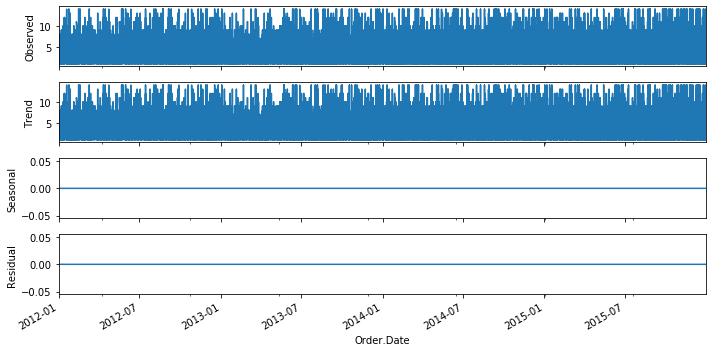

<Figure size 864x432 with 0 Axes>

In [89]:
#adjust figure size
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

season_quant.plot()
plt.figure(figsize=(12,6))

In [47]:
orders_dt.Category.unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [83]:
furn = orders_dt["Category"] == 'Furniture'

furn_df = orders_dt.loc[furn,:]

tech = orders_dt["Category"] == 'Technology'

tech_df = orders_dt.loc[tech,:]

office = orders_dt["Category"] == 'Office Supplies'

office_df = orders_dt.loc[office,:]

In [84]:
season_furn = seasonal_decompose(furn_df.Quantity, freq = 1)

season_tech = seasonal_decompose(tech_df.Quantity, freq = 1)

season_office = seasonal_decompose(office_df.Quantity, freq = 1)

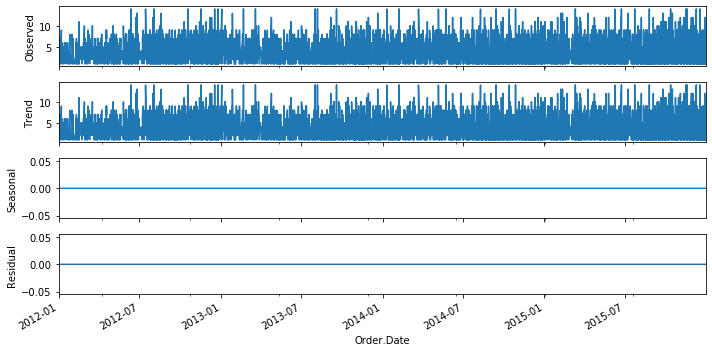

In [88]:
# rcParams['figure.figsize'] = 10, 5
# plt.figure(figsize=(12,6))

season_furn.plot()
plt.show()

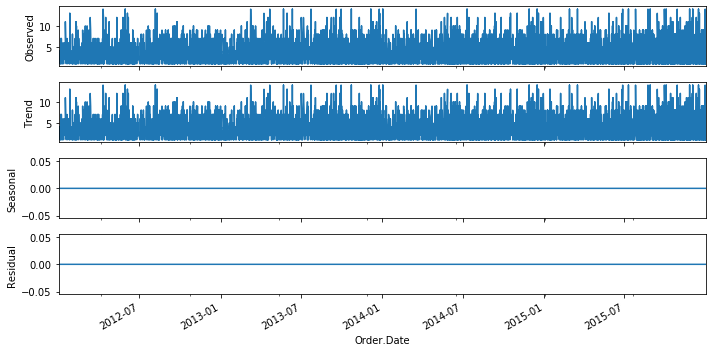

In [90]:
# rcParams['figure.figsize'] = 10, 5
# plt.figure(figsize=(12,6))

season_tech.plot()
plt.show()

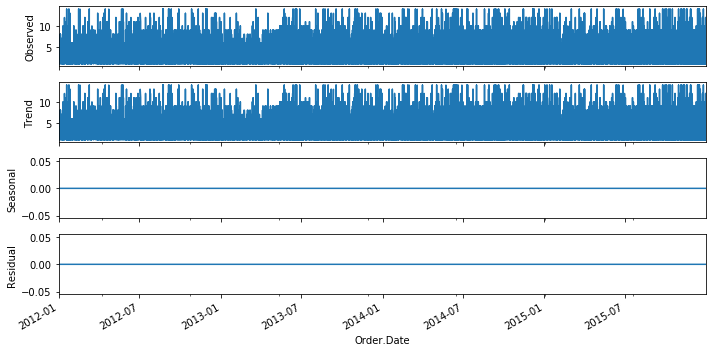

In [91]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#plt.figure(figsize=(12,6))

season_office.plot()
plt.show()

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	- 1. How much profit did we lose due to returns each year?

	- 2. How many customer returned more than once? more than 5 times?

    - 3. Which regions are more likely to return orders?
    
	- 4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [92]:
orders_c.head()

# orders_c.shape (51290, 24)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,22198.0,2,0.0,6215.0,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",370940.0,9,0.1,28877.0,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",517517.0,9,0.1,91997.0,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",289251.0,5,0.1,9654.0,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",283296.0,8,0.0,31152.0,903.04,Critical


In [95]:
orders_c.shape

(51290, 24)

In [96]:
returns_c = returns.copy()

returns_c.head()

#returns_c.shape(1079, 3)

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [127]:
# # Full left df
# pd.merge(orders_c, returns_c, how="left", left_on = 'Order.ID', right_on = 'Order ID')

# returns
merged_df = pd.merge(orders_c, returns_c, left_on = 'Order.ID', right_on = 'Order ID')

merged_df

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region_x,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Returned,Order ID,Region_y
0,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-TA-5060,Furniture,Tables,"Lesro Conference Table, with Bottom Storage",171516.0,2,0.0,72036.0,725.570,Critical,Yes,IN-2012-PB19210127-41259,Eastern Asia
1,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-BO-5762,Furniture,Bookcases,"Safco Classic Bookcase, Pine",219750.0,5,0.0,15375.0,627.270,Critical,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,30187,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-TA-5065,Furniture,Tables,"Lesro Round Table, with Bottom Storage",135603.0,3,0.0,31185.0,458.970,Critical,Yes,IN-2012-PB19210127-41259,Eastern Asia
3,30193,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,FUR-CH-5454,Furniture,Chairs,"Office Star Swivel Stool, Adjustable",88215.0,5,0.0,11460.0,203.920,Critical,Yes,IN-2012-PB19210127-41259,Eastern Asia
4,30189,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,Taiwan,Eastern Asia,Asia Pacific,TEC-MA-5494,Technology,Machines,"Okidata Calculator, Red",14832.0,3,0.0,6822.0,25.480,Critical,Yes,IN-2012-PB19210127-41259,Eastern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,35040,CA-2014-WB21850140-41654,2014-01-15,2014-01-21,Standard Class,WB-218501406,William Brown,Consumer,10011.0,New York City,New York,United States,Eastern US,USCA,OFF-BI-6098,Office Supplies,Binders,"Square Ring Data Binders, Rigid 75 Pt. Covers,...",4954.0,3,0.2,1734.0,2.670,Medium,Yes,CA-2014-WB21850140-41654,Eastern US
2216,35038,CA-2014-WB21850140-41654,2014-01-15,2014-01-21,Standard Class,WB-218501406,William Brown,Consumer,10011.0,New York City,New York,United States,Eastern US,USCA,OFF-EN-2850,Office Supplies,Envelopes,"#10 Gummed Flap White Envelopes, 100/Box",1652.0,4,0.0,760.0,1.690,Medium,Yes,CA-2014-WB21850140-41654,Eastern US
2217,25,US-2013-SJ2021582-41543,2013-09-26,2013-09-29,First Class,SJ-2021582,Sarah Jordon,Consumer,NaN,Hermosillo,Sonora,Mexico,Central America,LATAM,FUR-FU-3928,Furniture,Furnishings,"Deflect-O Clock, Black",18112.0,9,0.4,7556.0,1.085,Medium,Yes,US-2013-SJ2021582-41543,Central America
2218,36974,CA-2012-ZC21910140-41271,2012-12-28,2013-01-04,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,60610.0,Chicago,Illinois,United States,Central US,USCA,FUR-FU-6235,Furniture,Furnishings,Tenex Chairmats For Use with Hard Floors,3898.0,3,0.6,5067.0,5.290,Low,Yes,CA-2012-ZC21910140-41271,Central US


The sum of profit of returned items:

In [128]:
merged_df.Profit.sum()


13503595.0

Customers that returned items 1 or more times:
- 593

Customers that returned 5 or more times: 
- 124

In [117]:
cust = merged_df["Customer.Name"].value_counts()
cust

Patrick O'Brill       21
Jeremy Pistek         20
Muhammed Yedwab       17
Tom Boeckenhauer      17
Greg Tran             15
                      ..
Doug Jacobs            1
Toby Swindell          1
Brad Norvell           1
Thea Hendricks         1
Muhammed MacIntyre     1
Name: Customer.Name, Length: 593, dtype: int64

In [116]:
cust_5 = cust.reset_index(name = "count").query("count > 5")["index"]
cust_5

0         Patrick O'Brill
1           Jeremy Pistek
2         Muhammed Yedwab
3        Tom Boeckenhauer
4               Greg Tran
              ...        
119            Jill Fjeld
120    Christina Anderson
121           Chuck Magee
122        Stuart Calhoun
123          Mathew Reese
Name: index, Length: 124, dtype: object

In [119]:
regions = merged_df['Region_x'].value_counts()
regions

Central America      248
Western Europe       233
Western US           177
Oceania              154
Southeastern Asia    140
Eastern US           134
South America        133
Eastern Asia         131
Southern Europe      112
Southern Asia        111
Western Asia         108
Southern US           83
Northern Europe       76
Central US            74
Caribbean             69
Western Africa        60
North Africa          51
Eastern Europe        42
Southern Africa       25
Eastern Africa        18
Central Africa        17
Canada                15
Central Asia           9
Name: Region_x, dtype: int64

In [123]:
sub_cat = merged_df["Sub.Category"].value_counts()
sub_cat

Binders        269
Art            217
Storage        212
Paper          150
Chairs         147
Phones         145
Accessories    138
Labels         137
Furnishings    135
Bookcases      104
Supplies       103
Fasteners      102
Envelopes       99
Copiers         99
Machines        63
Appliances      59
Tables          41
Name: Sub.Category, dtype: int64

## Part II: Machine Learning and Business Use Case

Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”

In [ ]:
# # Full df
# pd.merge(orders_c, returns_c, how="left", left_on = 'Order.ID', right_on = 'Order ID')